In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
pd.set_option('mode.chained_assignment', None)

In [2]:
# data import
train = pd.read_csv('Training_Dataset.csv')
train_labels = pd.read_csv("Labels_Train.csv")
test = pd.read_csv("Repackaged_Benign_Testset.csv")
test_labels = pd.read_csv("Labels_Repackaged_Benign_Test.csv")

In [3]:
train['label'] = train_labels['label']
test['label'] = test_labels['label']
data = pd.concat([train, test])

In [4]:
print("Number of benign apps:", data[data['label']==0].shape[0])
print("Number of malicious apps:", data[data['label']==1].shape[0])

Number of benign apps: 4862
Number of malicious apps: 9142


In [5]:
sensor_types = data.iloc[:, -30:-1].columns

In [6]:
# get number of sensors used
data['num_sensors'] = data[sensor_types].sum(axis=1)

In [7]:
data['num_sensors'].describe()

count    14004.000000
mean         0.384462
std          1.569956
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         29.000000
Name: num_sensors, dtype: float64

Text(0.5, 1.0, 'Distribution of number of sensors used (Malicious apps)')

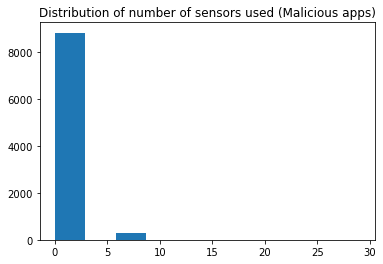

In [8]:
plt.hist(data[data['label']==1]['num_sensors'])
plt.title("Distribution of number of sensors used (Malicious apps)")

Text(0.5, 1.0, 'Distribution of number of sensors used (Benign apps)')

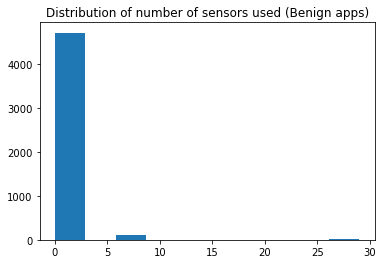

In [9]:
plt.hist(data[data['label']==0]['num_sensors'])
plt.title("Distribution of number of sensors used (Benign apps)")

In [10]:
# whether an app uses any sensors
data['use_sensors'] = data['num_sensors']>0

In [11]:
data.groupby('label')['use_sensors'].mean()

label
0    0.137392
1    0.186721
Name: use_sensors, dtype: float64

Let $p$ be the proportion of apps that use at least one sensor.

$$H_0: p_1 = p_2 $$

$$H_a: p_1 > p_2 $$

$p_1$: malicious apps

$p_2$: benign apps

In [12]:
significance = 0.01

sample_success_a, sample_size_a = (data[data['label']==1]['use_sensors'].value_counts().values[1], 
                                   data[data['label']==1]['use_sensors'].shape[0])
sample_success_b, sample_size_b = (data[data['label']==0]['use_sensors'].value_counts().values[1], 
                                   data[data['label']==0]['use_sensors'].shape[0])

successes = np.array([sample_success_a, sample_success_b])
samples = np.array([sample_size_a, sample_size_b])

stat, p_value = proportions_ztest(count = successes, nobs = samples, 
                                  alternative = 'larger')

print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))
if p_value > significance:
    print("Fail to reject the null hypothesis")
else:
    print("Reject the null hypothesis. Proportion of malicious apps using sensors is higher.")

z_stat: 7.405, p_value: 0.000
Reject the null hypothesis. Proportion of malicious apps using sensors is higher.


In [19]:
print('p1: %0.3f' % (sample_success_a / sample_size_a))
print('p2: %0.3f' % (sample_success_b / sample_size_b))

p1: 0.187
p2: 0.137
